Fashion MNIST数据集是一个图像分类的经典数据集，包含了10个类别的图像，每个图像都是28*28像素的灰度图像。

Epoch [1/10], Loss: 0.5055
Accuracy: 0.8285
Epoch [2/10], Loss: 0.3657
Accuracy: 0.8769
Epoch [3/10], Loss: 0.3269
Accuracy: 0.8907
Epoch [4/10], Loss: 0.3025
Accuracy: 0.8978
Epoch [5/10], Loss: 0.2792
Accuracy: 0.9059
Epoch [6/10], Loss: 0.2672
Accuracy: 0.9099
Epoch [7/10], Loss: 0.2529
Accuracy: 0.9140
Epoch [8/10], Loss: 0.2407
Accuracy: 0.9192
Epoch [9/10], Loss: 0.2306
Accuracy: 0.9225
Epoch [10/10], Loss: 0.2167
Accuracy: 0.9280


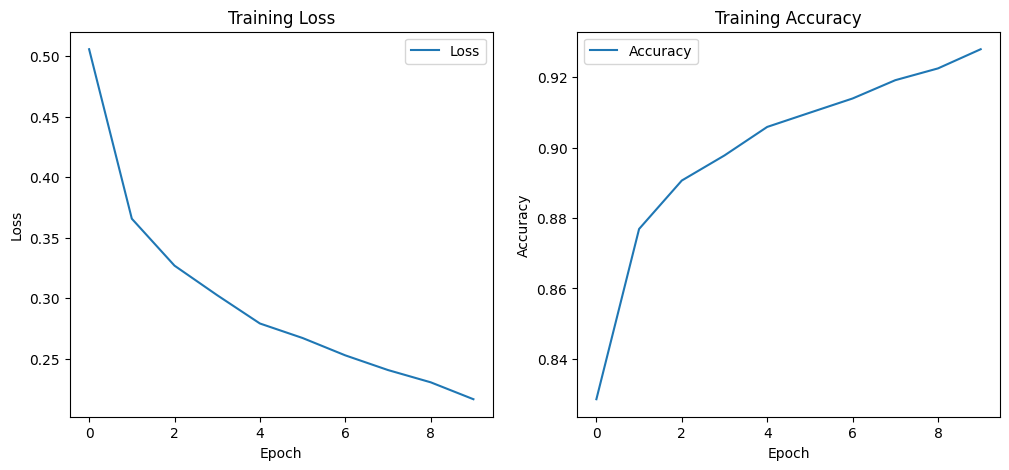

In [13]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# 加载数据集
data_folder = './FMNIST_data'
train_data = datasets.FashionMNIST(data_folder, download=False, train=True, transform=None)
test_data = datasets.FashionMNIST(data_folder, download=False, train=False, transform=None)

imgs = train_data.data
labels = train_data.targets

class FMINISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1, 28 * 28)
        self.x, self.y = x, y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        x, y = self.x[idx], self.y[idx]
        return x.to(device), y.to(device)
    
def get_data():
    data = FMINISTDataset(imgs, labels)
    partial_data = DataLoader(data, batch_size=64, shuffle=True)
    return partial_data

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    
        # self.fc1 = nn.Linear(28*28, 1024)
        # self.fc2 = nn.Linear(1024, 512)
        # self.fc3 = nn.Linear(512, 128)
        # self.fc4 = nn.Linear(128, 10)
        # self.relu = nn.ReLU()

        
    def forward(self, x):
        x = self.model(x)
        # x = self.relu(self.fc1(x))
        # x = self.relu(self.fc2(x))
        # x = self.relu(self.fc3(x))
        # x = self.fc4(x)
        return x
 
def loss_function():
    return nn.CrossEntropyLoss()

@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    y_pred = model(x)
    # y_pred是10类对应的概率，取概率最大的类别pred_class
    max_val, pred_class = y_pred.max(-1)
    is_correct = (pred_class == y)
    return is_correct.float().mean().item()

@torch.no_grad()
def val_loss(model, x, y, criterion):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    return loss.item()
    

def train(model, data, criterion, optimizer, epochs=5):
    model.train()
    losses, accs = [], []
    for epoch in range(epochs):
        epoch_losses, epoch_accs = [], []
        for batch_idx, (x, y) in enumerate(data):
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            # batch内的loss和acc计算
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy(x, y, model))
        # epoch内的loss和acc计算
        avg_loss = np.mean(epoch_losses)
        avg_acc = np.mean(epoch_accs)

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}')
        print(f'Accuracy: {avg_acc:.4f}')
        losses.append(avg_loss)
        accs.append(avg_acc)
    
    # 绘制loss和acc曲线
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(losses, label='Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(accs, label='Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy')
    plt.legend()
    plt.show()
        
        
def main():
    data = get_data()
    model = MyNet().to(device)
    criterion = loss_function()
    optimizer = Adam(model.parameters(), lr=0.001)
    train(model, data, criterion, optimizer, epochs=10)
    # torch.save(model.state_dict(), 'fashion_mnist_model.pth')
   
main()